In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd ## Used only to read data

In [2]:
# Loading dataset
data1 = pd.read_csv('datasets/hour.csv')

In [3]:
data2 = data1.drop(columns=['instant','dteday'])
data = np.array(data2)
print(data.shape)

(17379, 15)


In [4]:
### Creating features and labels for train and test set
### 10% of total data used as test data

x_train1 = np.empty([int(data.shape[0]*0.9),data.shape[1]])
y_train1 = np.empty([int(data.shape[0]*0.9),1])
x_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),data.shape[1]])
y_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),1])

for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]-1):
        if(i<int(data.shape[0]*0.9)):
            x_train1[i,j] = data[i][j]
        else:
            x_test1[i-int(data.shape[0]*0.9),j] = data[i][j]

# Using bias term
x_train1[:,14] = 1e-2
x_test1[:,14] = 1e-2


for i in range(0,data.shape[0]):
    if(i<int(data.shape[0]*0.9)):
        y_train1[i,0] = data[i][14]
    else:
        y_test1[i-int(data.shape[0]*0.9),0] = data[i][14]
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(15641, 15) (1738, 15) (15641, 1) (1738, 1)


In [5]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = []
v = []
for i in range(0,x_train1.shape[1]-1):
    if(i>=12 and i<14):
        mean = np.mean(x_train1[:,i])
        var = np.var(x_train1[:,i])
        m.append(mean)
        v.append(var)
        x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
        x_train[:,i] = x_train[:,i]/var
    else:
        x_train[:,i] = x_train1[:,i]

x_train[:,14] = x_train1[:,14]
y_test = y_test1
m1 = np.mean(y_train1)
v1 = np.var(x_train1)
y_train = np.empty(y_train1.shape)
y_train = y_train1 - m1*np.ones(y_train1.shape)
y_train = y_train/v1
# y_train = y_train1


In [6]:
# Training
epochs = 10000  ## Number of epochs
w = np.ones([x_train.shape[1],1])
batch_size = 15641    ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.001   ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = x_train[b:b+batch_size]@w 
        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_pred.shape[0] 
    y_pred = (x_train@w)
    l1 = np.mean((y_train-y_pred)**2)
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 501.27042384259255
Epoch 1 Loss 311.04475605180625
Epoch 2 Loss 196.64941042717953
Epoch 3 Loss 127.73277156636883
Epoch 4 Loss 86.09636351946631
Epoch 5 Loss 60.828409057993866
Epoch 6 Loss 45.38604855816646
Epoch 7 Loss 35.845920153198
Epoch 8 Loss 29.855256315604745
Epoch 9 Loss 26.002990323394954
Epoch 10 Loss 23.442688810653344
Epoch 11 Loss 21.666472147891447
Epoch 12 Loss 20.36946288320153
Epoch 13 Loss 19.36851227426891
Epoch 14 Loss 18.55347045269689
Epoch 15 Loss 17.85796885258607
Epoch 16 Loss 17.241901662466166
Epoch 17 Loss 16.680921701299418
Epoch 18 Loss 16.160141964412805
Epoch 19 Loss 15.670358788983716
Epoch 20 Loss 15.205786929330356
Epoch 21 Loss 14.76270114787082
Epoch 22 Loss 14.338621343858156
Epoch 23 Loss 13.931823587954806
Epoch 24 Loss 13.54104657606289
Epoch 25 Loss 13.165315265742542
Epoch 26 Loss 12.803834786146972
Epoch 27 Loss 12.455926495566928
Epoch 28 Loss 12.120989322553385
Epoch 29 Loss 11.79847627891066
Epoch 30 Loss 11.487880081374666

Epoch 297 Loss 1.797692364998294
Epoch 298 Loss 1.7941393512109345
Epoch 299 Loss 1.7906044685650322
Epoch 300 Loss 1.7870875557426635
Epoch 301 Loss 1.7835884532573962
Epoch 302 Loss 1.780107003425093
Epoch 303 Loss 1.7766430503354502
Epoch 304 Loss 1.7731964398242364
Epoch 305 Loss 1.7697670194462185
Epoch 306 Loss 1.766354638448743
Epoch 307 Loss 1.762959147745955
Epoch 308 Loss 1.7595803998936335
Epoch 309 Loss 1.7562182490646234
Epoch 310 Loss 1.7528725510248424
Epoch 311 Loss 1.7495431631098453
Epoch 312 Loss 1.746229944201928
Epoch 313 Loss 1.7429327547077567
Epoch 314 Loss 1.7396514565364942
Epoch 315 Loss 1.736385913078423
Epoch 316 Loss 1.7331359891840386
Epoch 317 Loss 1.7299015511436024
Epoch 318 Loss 1.7266824666671354
Epoch 319 Loss 1.7234786048648465
Epoch 320 Loss 1.720289836227974
Epoch 321 Loss 1.7171160326100334
Epoch 322 Loss 1.713957067208455
Epoch 323 Loss 1.7108128145466004
Epoch 324 Loss 1.707683150456149
Epoch 325 Loss 1.7045679520598398
Epoch 326 Loss 1.701467

Epoch 623 Loss 1.1202550637255329
Epoch 624 Loss 1.1189146913635488
Epoch 625 Loss 1.1175766711636128
Epoch 626 Loss 1.1162409946253884
Epoch 627 Loss 1.1149076533109943
Epoch 628 Loss 1.113576638844428
Epoch 629 Loss 1.1122479429109893
Epoch 630 Loss 1.1109215572567135
Epoch 631 Loss 1.1095974736878076
Epoch 632 Loss 1.1082756840700931
Epoch 633 Loss 1.1069561803284524
Epoch 634 Loss 1.1056389544462841
Epoch 635 Loss 1.1043239984649598
Epoch 636 Loss 1.1030113044832892
Epoch 637 Loss 1.1017008646569866
Epoch 638 Loss 1.1003926711981487
Epoch 639 Loss 1.099086716374729
Epoch 640 Loss 1.0977829925100266
Epoch 641 Loss 1.0964814919821713
Epoch 642 Loss 1.0951822072236208
Epoch 643 Loss 1.0938851307206579
Epoch 644 Loss 1.0925902550128948
Epoch 645 Loss 1.0912975726927818
Epoch 646 Loss 1.0900070764051204
Epoch 647 Loss 1.088718758846582
Epoch 648 Loss 1.0874326127652296
Epoch 649 Loss 1.086148630960046
Epoch 650 Loss 1.0848668062804656
Epoch 651 Loss 1.0835871316259105
Epoch 652 Loss 1.0

Epoch 953 Loss 0.7736697066186379
Epoch 954 Loss 0.7728474053514589
Epoch 955 Loss 0.772026214887957
Epoch 956 Loss 0.7712061334616249
Epoch 957 Loss 0.7703871593104765
Epoch 958 Loss 0.7695692906770211
Epoch 959 Loss 0.7687525258082372
Epoch 960 Loss 0.7679368629555486
Epoch 961 Loss 0.7671223003747975
Epoch 962 Loss 0.7663088363262212
Epoch 963 Loss 0.7654964690744259
Epoch 964 Loss 0.7646851968883634
Epoch 965 Loss 0.7638750180413056
Epoch 966 Loss 0.7630659308108222
Epoch 967 Loss 0.762257933478755
Epoch 968 Loss 0.7614510243311947
Epoch 969 Loss 0.7606452016584587
Epoch 970 Loss 0.7598404637550663
Epoch 971 Loss 0.7590368089197161
Epoch 972 Loss 0.7582342354552639
Epoch 973 Loss 0.7574327416686989
Epoch 974 Loss 0.7566323258711216
Epoch 975 Loss 0.755832986377722
Epoch 976 Loss 0.7550347215077573
Epoch 977 Loss 0.7542375295845298
Epoch 978 Loss 0.7534414089353652
Epoch 979 Loss 0.752646357891591
Epoch 980 Loss 0.7518523747885162
Epoch 981 Loss 0.7510594579654086
Epoch 982 Loss 0.7

Epoch 1270 Loss 0.5607550209050308
Epoch 1271 Loss 0.5602133071556631
Epoch 1272 Loss 0.5596722915342235
Epoch 1273 Loss 0.5591319730610279
Epoch 1274 Loss 0.5585923507578855
Epoch 1275 Loss 0.5580534236480947
Epoch 1276 Loss 0.5575151907564408
Epoch 1277 Loss 0.5569776511091928
Epoch 1278 Loss 0.5564408037340998
Epoch 1279 Loss 0.5559046476603893
Epoch 1280 Loss 0.5553691819187625
Epoch 1281 Loss 0.5548344055413933
Epoch 1282 Loss 0.5543003175619238
Epoch 1283 Loss 0.5537669170154621
Epoch 1284 Loss 0.5532342029385796
Epoch 1285 Loss 0.5527021743693071
Epoch 1286 Loss 0.552170830347133
Epoch 1287 Loss 0.5516401699129996
Epoch 1288 Loss 0.5511101921093012
Epoch 1289 Loss 0.5505808959798797
Epoch 1290 Loss 0.5500522805700239
Epoch 1291 Loss 0.5495243449264644
Epoch 1292 Loss 0.5489970880973722
Epoch 1293 Loss 0.5484705091323558
Epoch 1294 Loss 0.5479446070824577
Epoch 1295 Loss 0.5474193810001522
Epoch 1296 Loss 0.5468948299393425
Epoch 1297 Loss 0.5463709529553579
Epoch 1298 Loss 0.545

Epoch 1511 Loss 0.4483222602349603
Epoch 1512 Loss 0.4479235505864219
Epoch 1513 Loss 0.44752534043630826
Epoch 1514 Loss 0.44712762909721193
Epoch 1515 Loss 0.4467304158827139
Epoch 1516 Loss 0.4463337001073827
Epoch 1517 Loss 0.4459374810867722
Epoch 1518 Loss 0.44554175813742075
Epoch 1519 Loss 0.4451465305768491
Epoch 1520 Loss 0.44475179772355933
Epoch 1521 Loss 0.4443575588970334
Epoch 1522 Loss 0.443963813417731
Epoch 1523 Loss 0.44357056060708894
Epoch 1524 Loss 0.44317779978751887
Epoch 1525 Loss 0.44278553028240636
Epoch 1526 Loss 0.44239375141610937
Epoch 1527 Loss 0.4420024625139562
Epoch 1528 Loss 0.4416116629022447
Epoch 1529 Loss 0.4412213519082406
Epoch 1530 Loss 0.44083152886017546
Epoch 1531 Loss 0.4404421930872462
Epoch 1532 Loss 0.440053343919613
Epoch 1533 Loss 0.4396649806883978
Epoch 1534 Loss 0.43927710272568327
Epoch 1535 Loss 0.4388897093645108
Epoch 1536 Loss 0.43850279993887936
Epoch 1537 Loss 0.43811637378374413
Epoch 1538 Loss 0.43773043023501496
Epoch 153

Epoch 1781 Loss 0.35677789774147456
Epoch 1782 Loss 0.35649199894777317
Epoch 1783 Loss 0.356206445591589
Epoch 1784 Loss 0.3559212372053544
Epoch 1785 Loss 0.3556363733221648
Epoch 1786 Loss 0.35535185347577725
Epoch 1787 Loss 0.35506767720060994
Epoch 1788 Loss 0.35478384403174096
Epoch 1789 Loss 0.3545003535049074
Epoch 1790 Loss 0.35421720515650446
Epoch 1791 Loss 0.35393439852358444
Epoch 1792 Loss 0.3536519331438559
Epoch 1793 Loss 0.3533698085556823
Epoch 1794 Loss 0.3530880242980816
Epoch 1795 Loss 0.35280657991072517
Epoch 1796 Loss 0.35252547493393627
Epoch 1797 Loss 0.35224470890869003
Epoch 1798 Loss 0.3519642813766119
Epoch 1799 Loss 0.3516841918799766
Epoch 1800 Loss 0.3514044399617079
Epoch 1801 Loss 0.35112502516537664
Epoch 1802 Loss 0.3508459470352007
Epoch 1803 Loss 0.3505672051160437
Epoch 1804 Loss 0.3502887989534139
Epoch 1805 Loss 0.3500107280934637
Epoch 1806 Loss 0.3497329920829879
Epoch 1807 Loss 0.34945559046942415
Epoch 1808 Loss 0.34917852280085027
Epoch 18

Epoch 2090 Loss 0.2828228820378425
Epoch 2091 Loss 0.2826243732484139
Epoch 2092 Loss 0.28242609276106384
Epoch 2093 Loss 0.28222804027347315
Epoch 2094 Loss 0.28203021548374657
Epoch 2095 Loss 0.2818326180904125
Epoch 2096 Loss 0.281635247792422
Epoch 2097 Loss 0.2814381042891483
Epoch 2098 Loss 0.2812411872803863
Epoch 2099 Loss 0.28104449646635193
Epoch 2100 Loss 0.28084803154768145
Epoch 2101 Loss 0.28065179222543074
Epoch 2102 Loss 0.28045577820107503
Epoch 2103 Loss 0.28025998917650824
Epoch 2104 Loss 0.28006442485404204
Epoch 2105 Loss 0.2798690849364054
Epoch 2106 Loss 0.2796739691267443
Epoch 2107 Loss 0.27947907712862075
Epoch 2108 Loss 0.2792844086460124
Epoch 2109 Loss 0.2790899633833117
Epoch 2110 Loss 0.2788957410453257
Epoch 2111 Loss 0.27870174133727516
Epoch 2112 Loss 0.27850796396479377
Epoch 2113 Loss 0.2783144086339282
Epoch 2114 Loss 0.27812107505113687
Epoch 2115 Loss 0.27792796292328964
Epoch 2116 Loss 0.2777350719576672
Epoch 2117 Loss 0.27754240186196055
Epoch 

Epoch 2402 Loss 0.2305995007539273
Epoch 2403 Loss 0.23045946409242912
Epoch 2404 Loss 0.23031957923795854
Epoch 2405 Loss 0.2301798459948839
Epoch 2406 Loss 0.23004026416784454
Epoch 2407 Loss 0.22990083356175028
Epoch 2408 Loss 0.22976155398178114
Epoch 2409 Loss 0.22962242523338688
Epoch 2410 Loss 0.22948344712228655
Epoch 2411 Loss 0.22934461945446832
Epoch 2412 Loss 0.22920594203618888
Epoch 2413 Loss 0.2290674146739732
Epoch 2414 Loss 0.228929037174614
Epoch 2415 Loss 0.2287908093451715
Epoch 2416 Loss 0.22865273099297306
Epoch 2417 Loss 0.22851480192561266
Epoch 2418 Loss 0.2283770219509505
Epoch 2419 Loss 0.22823939087711287
Epoch 2420 Loss 0.22810190851249154
Epoch 2421 Loss 0.2279645746657434
Epoch 2422 Loss 0.22782738914579018
Epoch 2423 Loss 0.22769035176181796
Epoch 2424 Loss 0.22755346232327703
Epoch 2425 Loss 0.2274167206398811
Epoch 2426 Loss 0.22728012652160726
Epoch 2427 Loss 0.22714367977869546
Epoch 2428 Loss 0.22700738022164832
Epoch 2429 Loss 0.22687122766123036
E

Epoch 2666 Loss 0.1983566728329873
Epoch 2667 Loss 0.19825067184996759
Epoch 2668 Loss 0.19814477936089853
Epoch 2669 Loss 0.19803899522977242
Epoch 2670 Loss 0.19793331932076738
Epoch 2671 Loss 0.1978277514982471
Epoch 2672 Loss 0.19772229162676067
Epoch 2673 Loss 0.19761693957104215
Epoch 2674 Loss 0.19751169519601053
Epoch 2675 Loss 0.19740655836676932
Epoch 2676 Loss 0.19730152894860628
Epoch 2677 Loss 0.19719660680699322
Epoch 2678 Loss 0.1970917918075857
Epoch 2679 Loss 0.1969870838162228
Epoch 2680 Loss 0.1968824826989268
Epoch 2681 Loss 0.19677798832190307
Epoch 2682 Loss 0.19667360055153957
Epoch 2683 Loss 0.19656931925440677
Epoch 2684 Loss 0.19646514429725734
Epoch 2685 Loss 0.19636107554702595
Epoch 2686 Loss 0.1962571128708289
Epoch 2687 Loss 0.19615325613596382
Epoch 2688 Loss 0.1960495052099097
Epoch 2689 Loss 0.1959458599603264
Epoch 2690 Loss 0.19584232025505427
Epoch 2691 Loss 0.1957388859621142
Epoch 2692 Loss 0.19563555694970725
Epoch 2693 Loss 0.1955323330862142
Ep

Epoch 2973 Loss 0.17032299367927795
Epoch 2974 Loss 0.1702447114264337
Epoch 2975 Loss 0.17016650350893026
Epoch 2976 Loss 0.1700883698370488
Epoch 2977 Loss 0.1700103103211907
Epoch 2978 Loss 0.1699323248718776
Epoch 2979 Loss 0.16985441339975113
Epoch 2980 Loss 0.16977657581557254
Epoch 2981 Loss 0.1696988120302229
Epoch 2982 Loss 0.16962112195470264
Epoch 2983 Loss 0.1695435055001315
Epoch 2984 Loss 0.1694659625777484
Epoch 2985 Loss 0.16938849309891116
Epoch 2986 Loss 0.16931109697509644
Epoch 2987 Loss 0.16923377411789944
Epoch 2988 Loss 0.16915652443903392
Epoch 2989 Loss 0.16907934785033182
Epoch 2990 Loss 0.16900224426374333
Epoch 2991 Loss 0.16892521359133653
Epoch 2992 Loss 0.1688482557452973
Epoch 2993 Loss 0.1687713706379291
Epoch 2994 Loss 0.16869455818165296
Epoch 2995 Loss 0.168617818289007
Epoch 2996 Loss 0.16854115087264673
Epoch 2997 Loss 0.1684645558453444
Epoch 2998 Loss 0.1683880331199892
Epoch 2999 Loss 0.16831158260958695
Epoch 3000 Loss 0.16823520422725977
Epoch

Epoch 3291 Loss 0.14874579605219745
Epoch 3292 Loss 0.1486872041388764
Epoch 3293 Loss 0.1486286632875132
Epoch 3294 Loss 0.1485701734392623
Epoch 3295 Loss 0.1485117345353551
Epoch 3296 Loss 0.14845334651710013
Epoch 3297 Loss 0.14839500932588243
Epoch 3298 Loss 0.14833672290316396
Epoch 3299 Loss 0.14827848719048317
Epoch 3300 Loss 0.14822030212945497
Epoch 3301 Loss 0.14816216766177073
Epoch 3302 Loss 0.148104083729198
Epoch 3303 Loss 0.14804605027358056
Epoch 3304 Loss 0.14798806723683822
Epoch 3305 Loss 0.14793013456096674
Epoch 3306 Loss 0.14787225218803773
Epoch 3307 Loss 0.14781442006019851
Epoch 3308 Loss 0.14775663811967213
Epoch 3309 Loss 0.147698906308757
Epoch 3310 Loss 0.14764122456982715
Epoch 3311 Loss 0.14758359284533176
Epoch 3312 Loss 0.14752601107779537
Epoch 3313 Loss 0.14746847920981754
Epoch 3314 Loss 0.1474109971840728
Epoch 3315 Loss 0.14735356494331062
Epoch 3316 Loss 0.1472961824303554
Epoch 3317 Loss 0.14723884958810593
Epoch 3318 Loss 0.14718156635953594
Ep

Epoch 3603 Loss 0.13267487333454817
Epoch 3604 Loss 0.13262970577238378
Epoch 3605 Loss 0.13258457416563202
Epoch 3606 Loss 0.13253947847496297
Epoch 3607 Loss 0.1324944186610967
Epoch 3608 Loss 0.13244939468480324
Epoch 3609 Loss 0.13240440650690255
Epoch 3610 Loss 0.1323594540882642
Epoch 3611 Loss 0.1323145373898076
Epoch 3612 Loss 0.13226965637250193
Epoch 3613 Loss 0.13222481099736574
Epoch 3614 Loss 0.13218000122546725
Epoch 3615 Loss 0.13213522701792407
Epoch 3616 Loss 0.1320904883359032
Epoch 3617 Loss 0.132045785140621
Epoch 3618 Loss 0.1320011173933431
Epoch 3619 Loss 0.13195648505538413
Epoch 3620 Loss 0.13191188808810805
Epoch 3621 Loss 0.1318673264529278
Epoch 3622 Loss 0.13182280011130523
Epoch 3623 Loss 0.1317783090247512
Epoch 3624 Loss 0.13173385315482536
Epoch 3625 Loss 0.13168943246313622
Epoch 3626 Loss 0.13164504691134077
Epoch 3627 Loss 0.13160069646114497
Epoch 3628 Loss 0.13155638107430315
Epoch 3629 Loss 0.13151210071261812
Epoch 3630 Loss 0.13146785533794136
E

Epoch 3928 Loss 0.11968646847676494
Epoch 3929 Loss 0.11965117045905396
Epoch 3930 Loss 0.119615897898564
Epoch 3931 Loss 0.11958065076909524
Epoch 3932 Loss 0.11954542904447997
Epoch 3933 Loss 0.11951023269858256
Epoch 3934 Loss 0.11947506170529933
Epoch 3935 Loss 0.11943991603855872
Epoch 3936 Loss 0.119404795672321
Epoch 3937 Loss 0.11936970058057841
Epoch 3938 Loss 0.11933463073735502
Epoch 3939 Loss 0.11929958611670671
Epoch 3940 Loss 0.11926456669272115
Epoch 3941 Loss 0.1192295724395177
Epoch 3942 Loss 0.11919460333124748
Epoch 3943 Loss 0.11915965934209319
Epoch 3944 Loss 0.11912474044626913
Epoch 3945 Loss 0.11908984661802118
Epoch 3946 Loss 0.11905497783162676
Epoch 3947 Loss 0.11902013406139471
Epoch 3948 Loss 0.11898531528166532
Epoch 3949 Loss 0.11895052146681029
Epoch 3950 Loss 0.11891575259123267
Epoch 3951 Loss 0.11888100862936676
Epoch 3952 Loss 0.11884628955567818
Epoch 3953 Loss 0.11881159534466376
Epoch 3954 Loss 0.11877692597085147
Epoch 3955 Loss 0.118742281408800

Epoch 4226 Loss 0.11018939694837111
Epoch 4227 Loss 0.1101606531320182
Epoch 4228 Loss 0.11013192821570048
Epoch 4229 Loss 0.11010322218111394
Epoch 4230 Loss 0.11007453500997627
Epoch 4231 Loss 0.11004586668402655
Epoch 4232 Loss 0.11001721718502548
Epoch 4233 Loss 0.10998858649475522
Epoch 4234 Loss 0.10995997459501937
Epoch 4235 Loss 0.10993138146764296
Epoch 4236 Loss 0.10990280709447249
Epoch 4237 Loss 0.10987425145737575
Epoch 4238 Loss 0.10984571453824196
Epoch 4239 Loss 0.1098171963189816
Epoch 4240 Loss 0.10978869678152643
Epoch 4241 Loss 0.10976021590782954
Epoch 4242 Loss 0.10973175367986526
Epoch 4243 Loss 0.10970331007962901
Epoch 4244 Loss 0.10967488508913753
Epoch 4245 Loss 0.10964647869042862
Epoch 4246 Loss 0.10961809086556126
Epoch 4247 Loss 0.10958972159661548
Epoch 4248 Loss 0.10956137086569243
Epoch 4249 Loss 0.10953303865491425
Epoch 4250 Loss 0.10950472494642412
Epoch 4251 Loss 0.1094764297223862
Epoch 4252 Loss 0.10944815296498561
Epoch 4253 Loss 0.1094198946564

Epoch 4525 Loss 0.10236280966842912
Epoch 4526 Loss 0.1023389880845942
Epoch 4527 Loss 0.10231518077550458
Epoch 4528 Loss 0.10229138772819743
Epoch 4529 Loss 0.10226760892972443
Epoch 4530 Loss 0.10224384436715189
Epoch 4531 Loss 0.10222009402756073
Epoch 4532 Loss 0.10219635789804635
Epoch 4533 Loss 0.10217263596571871
Epoch 4534 Loss 0.10214892821770234
Epoch 4535 Loss 0.10212523464113621
Epoch 4536 Loss 0.10210155522317377
Epoch 4537 Loss 0.10207788995098292
Epoch 4538 Loss 0.10205423881174609
Epoch 4539 Loss 0.10203060179266002
Epoch 4540 Loss 0.10200697888093592
Epoch 4541 Loss 0.10198337006379933
Epoch 4542 Loss 0.10195977532849022
Epoch 4543 Loss 0.1019361946622629
Epoch 4544 Loss 0.10191262805238596
Epoch 4545 Loss 0.10188907548614237
Epoch 4546 Loss 0.10186553695082934
Epoch 4547 Loss 0.10184201243375833
Epoch 4548 Loss 0.10181850192225518
Epoch 4549 Loss 0.10179500540365984
Epoch 4550 Loss 0.10177152286532651
Epoch 4551 Loss 0.10174805429462365
Epoch 4552 Loss 0.101724599678

Epoch 4819 Loss 0.09592389223599769
Epoch 4820 Loss 0.09590376504904423
Epoch 4821 Loss 0.09588364888353879
Epoch 4822 Loss 0.0958635437301029
Epoch 4823 Loss 0.09584344957936815
Epoch 4824 Loss 0.09582336642197622
Epoch 4825 Loss 0.09580329424857878
Epoch 4826 Loss 0.09578323304983756
Epoch 4827 Loss 0.09576318281642426
Epoch 4828 Loss 0.09574314353902068
Epoch 4829 Loss 0.09572311520831847
Epoch 4830 Loss 0.09570309781501936
Epoch 4831 Loss 0.095683091349835
Epoch 4832 Loss 0.09566309580348704
Epoch 4833 Loss 0.09564311116670697
Epoch 4834 Loss 0.0956231374302363
Epoch 4835 Loss 0.0956031745848264
Epoch 4836 Loss 0.09558322262123861
Epoch 4837 Loss 0.09556328153024407
Epoch 4838 Loss 0.09554335130262384
Epoch 4839 Loss 0.09552343192916886
Epoch 4840 Loss 0.0955035234006799
Epoch 4841 Loss 0.09548362570796759
Epoch 4842 Loss 0.09546373884185236
Epoch 4843 Loss 0.09544386279316447
Epoch 4844 Loss 0.095423997552744
Epoch 4845 Loss 0.09540414311144078
Epoch 4846 Loss 0.0953842994601145
E

Epoch 5146 Loss 0.08987995610666426
Epoch 5147 Loss 0.08986298576968946
Epoch 5148 Loss 0.08984602385862722
Epoch 5149 Loss 0.08982907036680901
Epoch 5150 Loss 0.08981212528757307
Epoch 5151 Loss 0.08979518861426428
Epoch 5152 Loss 0.08977826034023433
Epoch 5153 Loss 0.0897613404588416
Epoch 5154 Loss 0.08974442896345118
Epoch 5155 Loss 0.0897275258474349
Epoch 5156 Loss 0.0897106311041712
Epoch 5157 Loss 0.0896937447270453
Epoch 5158 Loss 0.08967686670944908
Epoch 5159 Loss 0.089659997044781
Epoch 5160 Loss 0.08964313572644632
Epoch 5161 Loss 0.08962628274785685
Epoch 5162 Loss 0.08960943810243109
Epoch 5163 Loss 0.08959260178359421
Epoch 5164 Loss 0.08957577378477796
Epoch 5165 Loss 0.0895589540994207
Epoch 5166 Loss 0.08954214272096747
Epoch 5167 Loss 0.08952533964286986
Epoch 5168 Loss 0.08950854485858611
Epoch 5169 Loss 0.08949175836158102
Epoch 5170 Loss 0.08947498014532597
Epoch 5171 Loss 0.08945821020329893
Epoch 5172 Loss 0.08944144852898442
Epoch 5173 Loss 0.08942469511587353

Epoch 5451 Loss 0.08506562684210006
Epoch 5452 Loss 0.08505094618654575
Epoch 5453 Loss 0.08503627220128092
Epoch 5454 Loss 0.08502160488136452
Epoch 5455 Loss 0.08500694422186023
Epoch 5456 Loss 0.08499229021783634
Epoch 5457 Loss 0.08497764286436592
Epoch 5458 Loss 0.08496300215652675
Epoch 5459 Loss 0.08494836808940122
Epoch 5460 Loss 0.0849337406580765
Epoch 5461 Loss 0.08491911985764439
Epoch 5462 Loss 0.08490450568320135
Epoch 5463 Loss 0.08488989812984857
Epoch 5464 Loss 0.08487529719269182
Epoch 5465 Loss 0.08486070286684161
Epoch 5466 Loss 0.08484611514741307
Epoch 5467 Loss 0.08483153402952597
Epoch 5468 Loss 0.0848169595083047
Epoch 5469 Loss 0.08480239157887838
Epoch 5470 Loss 0.08478783023638065
Epoch 5471 Loss 0.08477327547594987
Epoch 5472 Loss 0.08475872729272896
Epoch 5473 Loss 0.08474418568186544
Epoch 5474 Loss 0.08472965063851158
Epoch 5475 Loss 0.08471512215782404
Epoch 5476 Loss 0.08470060023496427
Epoch 5477 Loss 0.08468608486509821
Epoch 5478 Loss 0.084671576043

Epoch 5807 Loss 0.08022683470610283
Epoch 5808 Loss 0.08021424832863928
Epoch 5809 Loss 0.08020166712410699
Epoch 5810 Loss 0.08018909108894727
Epoch 5811 Loss 0.08017652021960457
Epoch 5812 Loss 0.08016395451252656
Epoch 5813 Loss 0.08015139396416403
Epoch 5814 Loss 0.08013883857097089
Epoch 5815 Loss 0.08012628832940429
Epoch 5816 Loss 0.08011374323592445
Epoch 5817 Loss 0.08010120328699478
Epoch 5818 Loss 0.08008866847908182
Epoch 5819 Loss 0.08007613880865525
Epoch 5820 Loss 0.08006361427218785
Epoch 5821 Loss 0.0800510948661556
Epoch 5822 Loss 0.08003858058703754
Epoch 5823 Loss 0.0800260714313159
Epoch 5824 Loss 0.08001356739547598
Epoch 5825 Loss 0.0800010684760062
Epoch 5826 Loss 0.07998857466939813
Epoch 5827 Loss 0.07997608597214641
Epoch 5828 Loss 0.07996360238074882
Epoch 5829 Loss 0.07995112389170625
Epoch 5830 Loss 0.07993865050152266
Epoch 5831 Loss 0.07992618220670511
Epoch 5832 Loss 0.07991371900376379
Epoch 5833 Loss 0.07990126088921194
Epoch 5834 Loss 0.0798888078595

Epoch 6056 Loss 0.07724396940265159
Epoch 6057 Loss 0.07723256874873755
Epoch 6058 Loss 0.07722117247128313
Epoch 6059 Loss 0.07720978056742198
Epoch 6060 Loss 0.07719839303429007
Epoch 6061 Loss 0.07718700986902587
Epoch 6062 Loss 0.07717563106877025
Epoch 6063 Loss 0.0771642566306665
Epoch 6064 Loss 0.07715288655186035
Epoch 6065 Loss 0.07714152082949992
Epoch 6066 Loss 0.07713015946073574
Epoch 6067 Loss 0.07711880244272079
Epoch 6068 Loss 0.07710744977261044
Epoch 6069 Loss 0.07709610144756247
Epoch 6070 Loss 0.07708475746473703
Epoch 6071 Loss 0.07707341782129672
Epoch 6072 Loss 0.07706208251440651
Epoch 6073 Loss 0.0770507515412338
Epoch 6074 Loss 0.07703942489894834
Epoch 6075 Loss 0.0770281025847223
Epoch 6076 Loss 0.07701678459573025
Epoch 6077 Loss 0.07700547092914908
Epoch 6078 Loss 0.07699416158215819
Epoch 6079 Loss 0.07698285655193922
Epoch 6080 Loss 0.0769715558356763
Epoch 6081 Loss 0.07696025943055587
Epoch 6082 Loss 0.07694896733376676
Epoch 6083 Loss 0.07693767954250

Epoch 6364 Loss 0.07392649559787584
Epoch 6365 Loss 0.07391631822743913
Epoch 6366 Loss 0.07390614445433921
Epoch 6367 Loss 0.07389597427635208
Epoch 6368 Loss 0.0738858076912554
Epoch 6369 Loss 0.07387564469682864
Epoch 6370 Loss 0.0738654852908531
Epoch 6371 Loss 0.07385532947111181
Epoch 6372 Loss 0.07384517723538957
Epoch 6373 Loss 0.07383502858147296
Epoch 6374 Loss 0.07382488350715036
Epoch 6375 Loss 0.07381474201021185
Epoch 6376 Loss 0.07380460408844933
Epoch 6377 Loss 0.07379446973965645
Epoch 6378 Loss 0.0737843389616286
Epoch 6379 Loss 0.07377421175216296
Epoch 6380 Loss 0.07376408810905845
Epoch 6381 Loss 0.07375396803011575
Epoch 6382 Loss 0.0737438515131373
Epoch 6383 Loss 0.0737337385559273
Epoch 6384 Loss 0.07372362915629167
Epoch 6385 Loss 0.07371352331203812
Epoch 6386 Loss 0.07370342102097609
Epoch 6387 Loss 0.07369332228091677
Epoch 6388 Loss 0.07368322708967305
Epoch 6389 Loss 0.07367313544505966
Epoch 6390 Loss 0.07366304734489298
Epoch 6391 Loss 0.073652962786991

Epoch 6649 Loss 0.07116349227028433
Epoch 6650 Loss 0.07115425648368824
Epoch 6651 Loss 0.07114502372641035
Epoch 6652 Loss 0.07113579399667008
Epoch 6653 Loss 0.07112656729268813
Epoch 6654 Loss 0.07111734361268658
Epoch 6655 Loss 0.07110812295488887
Epoch 6656 Loss 0.07109890531751982
Epoch 6657 Loss 0.07108969069880551
Epoch 6658 Loss 0.07108047909697345
Epoch 6659 Loss 0.07107127051025248
Epoch 6660 Loss 0.07106206493687275
Epoch 6661 Loss 0.07105286237506582
Epoch 6662 Loss 0.07104366282306451
Epoch 6663 Loss 0.07103446627910302
Epoch 6664 Loss 0.07102527274141694
Epoch 6665 Loss 0.07101608220824314
Epoch 6666 Loss 0.07100689467781982
Epoch 6667 Loss 0.07099771014838654
Epoch 6668 Loss 0.07098852861818421
Epoch 6669 Loss 0.07097935008545506
Epoch 6670 Loss 0.07097017454844262
Epoch 6671 Loss 0.07096100200539184
Epoch 6672 Loss 0.0709518324545489
Epoch 6673 Loss 0.07094266589416137
Epoch 6674 Loss 0.07093350232247812
Epoch 6675 Loss 0.07092434173774939
Epoch 6676 Loss 0.07091518413

Epoch 6933 Loss 0.06865588035153052
Epoch 6934 Loss 0.06864743813605599
Epoch 6935 Loss 0.06863899849421079
Epoch 6936 Loss 0.06863056142455311
Epoch 6937 Loss 0.0686221269256422
Epoch 6938 Loss 0.06861369499603832
Epoch 6939 Loss 0.06860526563430283
Epoch 6940 Loss 0.06859683883899809
Epoch 6941 Loss 0.06858841460868752
Epoch 6942 Loss 0.06857999294193559
Epoch 6943 Loss 0.06857157383730779
Epoch 6944 Loss 0.06856315729337066
Epoch 6945 Loss 0.0685547433086918
Epoch 6946 Loss 0.06854633188183977
Epoch 6947 Loss 0.06853792301138431
Epoch 6948 Loss 0.06852951669589606
Epoch 6949 Loss 0.06852111293394675
Epoch 6950 Loss 0.06851271172410917
Epoch 6951 Loss 0.06850431306495706
Epoch 6952 Loss 0.06849591695506531
Epoch 6953 Loss 0.06848752339300977
Epoch 6954 Loss 0.06847913237736732
Epoch 6955 Loss 0.06847074390671586
Epoch 6956 Loss 0.06846235797963439
Epoch 6957 Loss 0.06845397459470284
Epoch 6958 Loss 0.06844559375050226
Epoch 6959 Loss 0.06843721544561467
Epoch 6960 Loss 0.068428839678

Epoch 7248 Loss 0.06611682116543073
Epoch 7249 Loss 0.06610912339009718
Epoch 7250 Loss 0.0661014277815826
Epoch 7251 Loss 0.0660937343387338
Epoch 7252 Loss 0.06608604306039839
Epoch 7253 Loss 0.06607835394542474
Epoch 7254 Loss 0.06607066699266208
Epoch 7255 Loss 0.06606298220096034
Epoch 7256 Loss 0.06605529956917036
Epoch 7257 Loss 0.06604761909614366
Epoch 7258 Loss 0.06603994078073268
Epoch 7259 Loss 0.06603226462179054
Epoch 7260 Loss 0.06602459061817124
Epoch 7261 Loss 0.0660169187687295
Epoch 7262 Loss 0.0660092490723209
Epoch 7263 Loss 0.06600158152780174
Epoch 7264 Loss 0.06599391613402918
Epoch 7265 Loss 0.06598625288986111
Epoch 7266 Loss 0.06597859179415626
Epoch 7267 Loss 0.0659709328457741
Epoch 7268 Loss 0.06596327604357495
Epoch 7269 Loss 0.06595562138641987
Epoch 7270 Loss 0.06594796887317068
Epoch 7271 Loss 0.0659403185026901
Epoch 7272 Loss 0.06593267027384148
Epoch 7273 Loss 0.06592502418548907
Epoch 7274 Loss 0.06591738023649786
Epoch 7275 Loss 0.0659097384257336

Epoch 7537 Loss 0.06397796423877056
Epoch 7538 Loss 0.06397084768252584
Epoch 7539 Loss 0.06396373299058564
Epoch 7540 Loss 0.06395662016200229
Epoch 7541 Loss 0.06394950919582879
Epoch 7542 Loss 0.06394240009111869
Epoch 7543 Loss 0.06393529284692626
Epoch 7544 Loss 0.0639281874623063
Epoch 7545 Loss 0.06392108393631436
Epoch 7546 Loss 0.06391398226800653
Epoch 7547 Loss 0.0639068824564395
Epoch 7548 Loss 0.06389978450067071
Epoch 7549 Loss 0.06389268839975815
Epoch 7550 Loss 0.06388559415276039
Epoch 7551 Loss 0.06387850175873673
Epoch 7552 Loss 0.06387141121674704
Epoch 7553 Loss 0.06386432252585178
Epoch 7554 Loss 0.06385723568511213
Epoch 7555 Loss 0.06385015069358982
Epoch 7556 Loss 0.06384306755034722
Epoch 7557 Loss 0.06383598625444731
Epoch 7558 Loss 0.06382890680495373
Epoch 7559 Loss 0.06382182920093073
Epoch 7560 Loss 0.06381475344144316
Epoch 7561 Loss 0.06380767952555648
Epoch 7562 Loss 0.06380060745233684
Epoch 7563 Loss 0.06379353722085093
Epoch 7564 Loss 0.063786468830

Epoch 7854 Loss 0.06181065590624762
Epoch 7855 Loss 0.06180408599408487
Epoch 7856 Loss 0.06179751767498066
Epoch 7857 Loss 0.061790950948164634
Epoch 7858 Loss 0.06178438581286696
Epoch 7859 Loss 0.061777822268318246
Epoch 7860 Loss 0.06177126031374963
Epoch 7861 Loss 0.061764699948392725
Epoch 7862 Loss 0.06175814117147965
Epoch 7863 Loss 0.061751583982243
Epoch 7864 Loss 0.06174502837991587
Epoch 7865 Loss 0.06173847436373185
Epoch 7866 Loss 0.06173192193292501
Epoch 7867 Loss 0.06172537108672993
Epoch 7868 Loss 0.061718821824381646
Epoch 7869 Loss 0.06171227414511574
Epoch 7870 Loss 0.06170572804816821
Epoch 7871 Loss 0.061699183532775606
Epoch 7872 Loss 0.06169264059817493
Epoch 7873 Loss 0.061686099243603694
Epoch 7874 Loss 0.06167955946829987
Epoch 7875 Loss 0.06167302127150196
Epoch 7876 Loss 0.061666484652448915
Epoch 7877 Loss 0.061659949610380196
Epoch 7878 Loss 0.06165341614453573
Epoch 7879 Loss 0.061646884254155945
Epoch 7880 Loss 0.06164035393848175
Epoch 7881 Loss 0.061

Epoch 8183 Loss 0.0597308048829042
Epoch 8184 Loss 0.059724720257246525
Epoch 8185 Loss 0.059718636995803626
Epoch 8186 Loss 0.05971255509794933
Epoch 8187 Loss 0.05970647456305784
Epoch 8188 Loss 0.05970039539050374
Epoch 8189 Loss 0.059694317579662017
Epoch 8190 Loss 0.05968824112990801
Epoch 8191 Loss 0.059682166040617504
Epoch 8192 Loss 0.05967609231116662
Epoch 8193 Loss 0.05967001994093187
Epoch 8194 Loss 0.059663948929290195
Epoch 8195 Loss 0.05965787927561885
Epoch 8196 Loss 0.059651810979295526
Epoch 8197 Loss 0.059645744039698294
Epoch 8198 Loss 0.0596396784562056
Epoch 8199 Loss 0.05963361422819627
Epoch 8200 Loss 0.05962755135504951
Epoch 8201 Loss 0.05962148983614493
Epoch 8202 Loss 0.05961542967086253
Epoch 8203 Loss 0.059609370858582617
Epoch 8204 Loss 0.05960331339868599
Epoch 8205 Loss 0.05959725729055377
Epoch 8206 Loss 0.05959120253356745
Epoch 8207 Loss 0.05958514912710893
Epoch 8208 Loss 0.059579097070560506
Epoch 8209 Loss 0.05957304636330481
Epoch 8210 Loss 0.059

Epoch 8452 Loss 0.058141285813813934
Epoch 8453 Loss 0.058135546776315154
Epoch 8454 Loss 0.05812980894770403
Epoch 8455 Loss 0.05812407232744926
Epoch 8456 Loss 0.05811833691501981
Epoch 8457 Loss 0.058112602709885004
Epoch 8458 Loss 0.058106869711514464
Epoch 8459 Loss 0.05810113791937816
Epoch 8460 Loss 0.05809540733294635
Epoch 8461 Loss 0.05808967795168964
Epoch 8462 Loss 0.05808394977507895
Epoch 8463 Loss 0.058078222802585476
Epoch 8464 Loss 0.058072497033680774
Epoch 8465 Loss 0.058066772467836716
Epoch 8466 Loss 0.05806104910452548
Epoch 8467 Loss 0.058055326943219576
Epoch 8468 Loss 0.05804960598339181
Epoch 8469 Loss 0.058043886224515326
Epoch 8470 Loss 0.05803816766606356
Epoch 8471 Loss 0.05803245030751031
Epoch 8472 Loss 0.05802673414832963
Epoch 8473 Loss 0.05802101918799594
Epoch 8474 Loss 0.05801530542598395
Epoch 8475 Loss 0.0580095928617687
Epoch 8476 Loss 0.05800388149482555
Epoch 8477 Loss 0.057998171324630136
Epoch 8478 Loss 0.05799246235065846
Epoch 8479 Loss 0.0

Epoch 8732 Loss 0.056579728561419095
Epoch 8733 Loss 0.05657430836402027
Epoch 8734 Loss 0.05656888923847702
Epoch 8735 Loss 0.05656347118433957
Epoch 8736 Loss 0.05655805420115839
Epoch 8737 Loss 0.05655263828848421
Epoch 8738 Loss 0.05654722344586801
Epoch 8739 Loss 0.056541809672861085
Epoch 8740 Loss 0.05653639696901494
Epoch 8741 Loss 0.056530985333881345
Epoch 8742 Loss 0.056525574767012386
Epoch 8743 Loss 0.05652016526796035
Epoch 8744 Loss 0.056514756836277824
Epoch 8745 Loss 0.056509349471517645
Epoch 8746 Loss 0.056503943173232915
Epoch 8747 Loss 0.056498537940977
Epoch 8748 Loss 0.05649313377430352
Epoch 8749 Loss 0.056487730672766356
Epoch 8750 Loss 0.05648232863591968
Epoch 8751 Loss 0.056476927663317876
Epoch 8752 Loss 0.05647152775451563
Epoch 8753 Loss 0.056466128909067874
Epoch 8754 Loss 0.05646073112652979
Epoch 8755 Loss 0.056455334406456836
Epoch 8756 Loss 0.05644993874840475
Epoch 8757 Loss 0.05644454415192947
Epoch 8758 Loss 0.05643915061658727
Epoch 8759 Loss 0.0

Epoch 9035 Loss 0.05498447194985473
Epoch 9036 Loss 0.05497935709898258
Epoch 9037 Loss 0.0549742431949883
Epoch 9038 Loss 0.054969130237494584
Epoch 9039 Loss 0.054964018226124275
Epoch 9040 Loss 0.05495890716050048
Epoch 9041 Loss 0.054953797040246506
Epoch 9042 Loss 0.05494868786498588
Epoch 9043 Loss 0.05494357963434233
Epoch 9044 Loss 0.05493847234793981
Epoch 9045 Loss 0.05493336600540251
Epoch 9046 Loss 0.054928260606354785
Epoch 9047 Loss 0.05492315615042124
Epoch 9048 Loss 0.0549180526372267
Epoch 9049 Loss 0.05491295006639618
Epoch 9050 Loss 0.054907848437554925
Epoch 9051 Loss 0.054902747750328385
Epoch 9052 Loss 0.054897648004342235
Epoch 9053 Loss 0.05489254919922235
Epoch 9054 Loss 0.054887451334594835
Epoch 9055 Loss 0.054882354410086
Epoch 9056 Loss 0.05487725842532237
Epoch 9057 Loss 0.054872163379930686
Epoch 9058 Loss 0.05486706927353787
Epoch 9059 Loss 0.05486197610577112
Epoch 9060 Loss 0.054856883876257805
Epoch 9061 Loss 0.0548517925846255
Epoch 9062 Loss 0.05484

Epoch 9347 Loss 0.05343276580570771
Epoch 9348 Loss 0.05342792910320615
Epoch 9349 Loss 0.05342309323965124
Epoch 9350 Loss 0.053418258214726566
Epoch 9351 Loss 0.05341342402811592
Epoch 9352 Loss 0.053408590679503286
Epoch 9353 Loss 0.05340375816857279
Epoch 9354 Loss 0.05339892649500874
Epoch 9355 Loss 0.053394095658495636
Epoch 9356 Loss 0.05338926565871817
Epoch 9357 Loss 0.05338443649536115
Epoch 9358 Loss 0.05337960816810962
Epoch 9359 Loss 0.053374780676648755
Epoch 9360 Loss 0.053369954020663954
Epoch 9361 Loss 0.05336512819984074
Epoch 9362 Loss 0.05336030321386484
Epoch 9363 Loss 0.05335547906242215
Epoch 9364 Loss 0.053350655745198726
Epoch 9365 Loss 0.05334583326188083
Epoch 9366 Loss 0.05334101161215489
Epoch 9367 Loss 0.05333619079570748
Epoch 9368 Loss 0.05333137081222538
Epoch 9369 Loss 0.05332655166139552
Epoch 9370 Loss 0.053321733342905034
Epoch 9371 Loss 0.05331691585644121
Epoch 9372 Loss 0.053312099201691485
Epoch 9373 Loss 0.053307283378343534
Epoch 9374 Loss 0.0

Epoch 9648 Loss 0.05201342998887527
Epoch 9649 Loss 0.05200883228133164
Epoch 9650 Loss 0.05200423532497848
Epoch 9651 Loss 0.051999639119547685
Epoch 9652 Loss 0.05199504366477134
Epoch 9653 Loss 0.05199044896038165
Epoch 9654 Loss 0.05198585500611096
Epoch 9655 Loss 0.05198126180169176
Epoch 9656 Loss 0.05197666934685673
Epoch 9657 Loss 0.0519720776413386
Epoch 9658 Loss 0.05196748668487034
Epoch 9659 Loss 0.05196289647718502
Epoch 9660 Loss 0.051958307018015876
Epoch 9661 Loss 0.05195371830709625
Epoch 9662 Loss 0.05194913034415966
Epoch 9663 Loss 0.05194454312893979
Epoch 9664 Loss 0.051939956661170406
Epoch 9665 Loss 0.05193537094058548
Epoch 9666 Loss 0.05193078596691909
Epoch 9667 Loss 0.05192620173990546
Epoch 9668 Loss 0.051921618259279
Epoch 9669 Loss 0.051917035524774204
Epoch 9670 Loss 0.05191245353612575
Epoch 9671 Loss 0.05190787229306844
Epoch 9672 Loss 0.05190329179533725
Epoch 9673 Loss 0.051898712042667265
Epoch 9674 Loss 0.05189413303479373
Epoch 9675 Loss 0.05188955

Epoch 9963 Loss 0.05060097538475103
Epoch 9964 Loss 0.05059660176037413
Epoch 9965 Loss 0.050592228809497236
Epoch 9966 Loss 0.05058785653189394
Epoch 9967 Loss 0.05058348492733794
Epoch 9968 Loss 0.050579113995603074
Epoch 9969 Loss 0.0505747437364633
Epoch 9970 Loss 0.05057037414969265
Epoch 9971 Loss 0.050566005235065326
Epoch 9972 Loss 0.050561636992355635
Epoch 9973 Loss 0.05055726942133799
Epoch 9974 Loss 0.050552902521786944
Epoch 9975 Loss 0.05054853629347715
Epoch 9976 Loss 0.05054417073618339
Epoch 9977 Loss 0.05053980584968057
Epoch 9978 Loss 0.0505354416337437
Epoch 9979 Loss 0.05053107808814792
Epoch 9980 Loss 0.05052671521266849
Epoch 9981 Loss 0.05052235300708078
Epoch 9982 Loss 0.05051799147116028
Epoch 9983 Loss 0.05051363060468262
Epoch 9984 Loss 0.050509270407423514
Epoch 9985 Loss 0.05050491087915882
Epoch 9986 Loss 0.05050055201966449
Epoch 9987 Loss 0.05049619382871663
Epoch 9988 Loss 0.05049183630609144
Epoch 9989 Loss 0.05048747945156523
Epoch 9990 Loss 0.050483

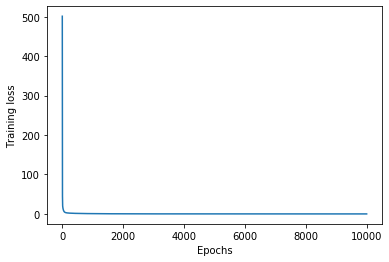

In [7]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [8]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]-1):
    if(i>=12 and i<14):
        x_test[:,i] = x_test1[:,i] - m[i-12]*np.ones(x_test1[:,i].shape)
        x_test[:,i] = x_test[:,i]/v[i-12]
    else:
        x_test[:,i] = x_test1[:,i]
x_test[:,14] = x_test1[:,14]

In [9]:
# Predicting
y_hat1 = x_test@w
# Denormalising prediction
y_hat = y_hat1*v1
y_hat = y_hat+m1

In [10]:
loss_te = np.mean((y_test-y_hat)**2)
print("Testing MSE after denormalising = ",loss_te)

Testing MSE after denormalising =  1193892.5157299268
